In [9]:
deps <- c("ISLR", "Metrics", "ggplot2", "tidyr", "dplyr", "patchwork", "gridExtra", "knitr")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}

set.seed(42)
options(scipen=999)

In [10]:
df <- read.csv("./data_v2_edited.csv")

kable(df)



|gil   |type            |command                                |       cycles| instructions| task_clock| time_elapsed| user_time| sys_time|
|:-----|:---------------|:--------------------------------------|------------:|------------:|----------:|------------:|---------:|--------:|
|true  |plain           |plain                                  |   1628968401|   4752050558|     390.02|    0.3579807|  0.390477| 0.000000|
|true  |plain           |plain.py                               |   1600420527|   4753646773|     377.22|    0.3461656|  0.377573| 0.000000|
|true  |plain           |plain.py                               |   1641366940|   4753374860|     392.60|    0.3604461|  0.382000| 0.010914|
|true  |plain           |plain.py                               |   1638868803|   4754140437|     391.65|    0.3922753|  0.381944| 0.010051|
|true  |plain           |plain.py                               |   1686269321|   4752334844|     413.00|    0.4136323|  0.413373| 0.000000|
|true  |pla

In [7]:
head(df)

,gil,type,command,run,cycles,instructions,task.clock,time_elapsed,user_time,sys_time
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,true,plain,plain.py,1,1628968401,4752050558,390.02,0.3579807,0.390477,0.000000
2,true,plain,plain.py,2,1600420527,4753646773,377.22,0.3461656,0.377573,0.000000
3,true,plain,plain.py,3,1641366940,4753374860,392.60,0.3604461,0.382000,0.010914
4,true,plain,plain.py,4,1638868803,4754140437,391.65,0.3922753,0.381944,0.010051
5,true,plain,plain.py,5,1686269321,4752334844,413.00,0.4136323,0.413373,0.000000
6,true,plain,plain.py,6,1662769092,4755221760,403.86,0.3812487,0.404172,0.000000


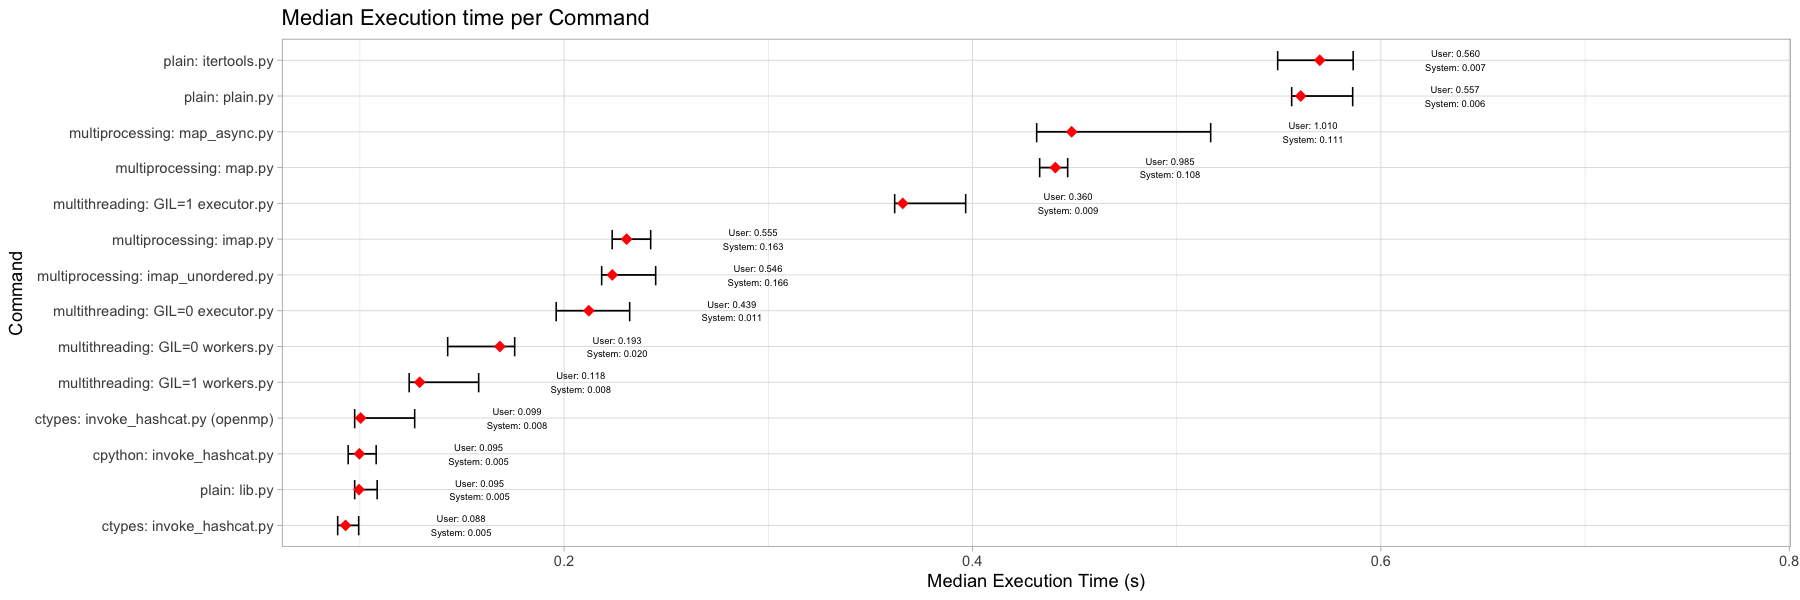

In [17]:
options(repr.plot.width = 15, repr.plot.height = 5)

plot <- ggplot(df, aes(y = reorder(command, median), x = median)) +
    geom_segment(aes(x = min, xend = max, yend = command)) +
    geom_point(aes(x = min), shape = "|", size = 4) +
    geom_point(aes(x = max), shape = "|", size = 4) +
    geom_point(aes(x = median), shape = 18, size = 3, color = "red") +
    geom_text(aes(x = max + 0.05, label = sprintf("User: %.3f\nSystem: %.3f", user, system)), hjust = +0.5, size = 2) +
    labs(title = "Median Execution time per Command", x = "Median Execution Time (s)", y = "Command") +
    theme(axis.text.y = element_text(size = 8), plot.margin = margin(r = 100, unit = "pt")) +
    scale_x_continuous(expand = expansion(mult = c(0.05, 0.3))) +
    theme_light()

ggsave("./assets/perf.png", plot = plot, width = 15, height = 5)
plot